In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy

LAYING=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING/Subject_1.csv")
SITTING=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING/Subject_1.csv")
STANDING=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING/Subject_1.csv")
WALKING=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING/Subject_1.csv")
WALKING_DOWNSTAIRS=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
WALKING_UPSTAIRS=pd.read_csv("/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")

def waveform(Activity, s, ax):
    accx = Activity['accx'][:500]
    accy = Activity['accy'][:500]
    accz = Activity['accz'][:500]
    ax.plot(accx, label="accx")
    ax.plot(accy, label="accy")
    ax.plot(accz, label="accz")
    ax.set_title(s)
    ax.set_xlabel("Time")
    ax.set_ylabel("m/s²")
    ax.legend()

fig, axs = plt.subplots(1, 6, figsize=(24, 6))

waveform(LAYING, "LAYING", axs[0])
waveform(SITTING, "SITTING", axs[1])
waveform(STANDING, "STANDING", axs[2])
waveform(WALKING, "WALKING", axs[3])
waveform(WALKING_DOWNSTAIRS, "WALKING_DOWNSTAIRS", axs[4])
waveform(WALKING_UPSTAIRS, "WALKING_UPSTAIRS", axs[5])

plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING/Subject_1.csv'

We think that the machine learning model which we will build would classify the activities with a decent enough accuracy as there are some distinct boundaries to differentiate the activities like laying and standing from the rest and training the model to an optimal depth would classify the activities based on the data.

2.Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration.for each activity and justify your answer. [0.5 marks]

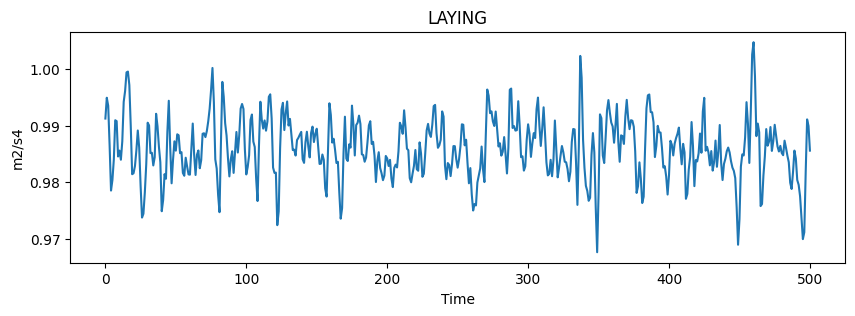

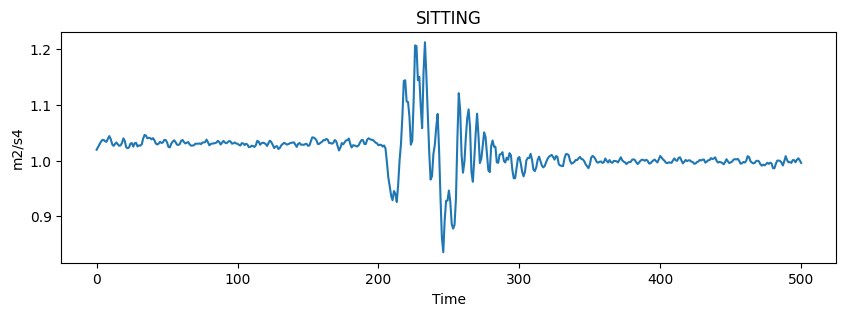

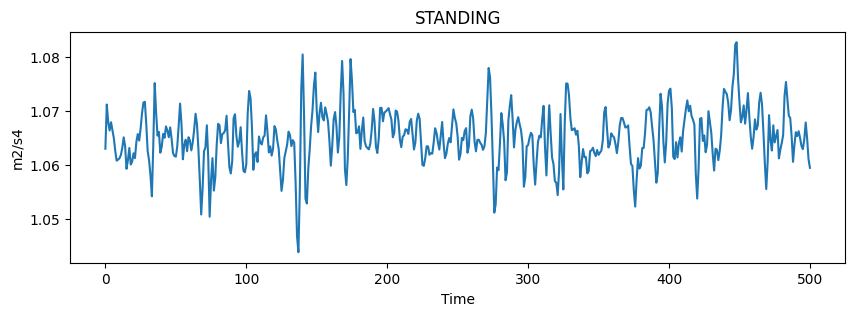

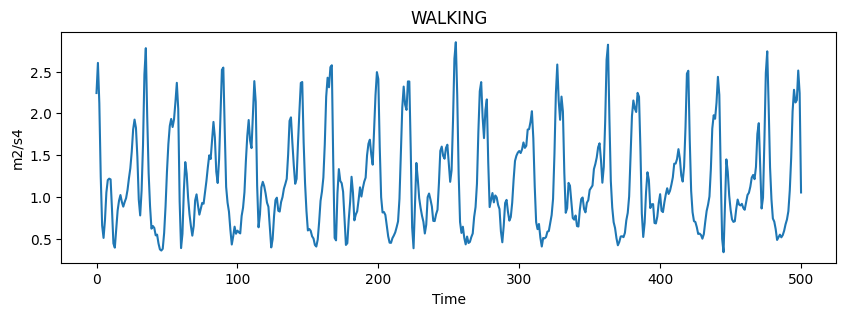

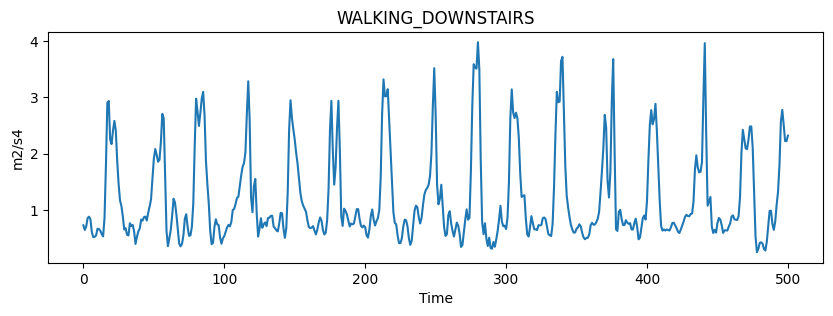

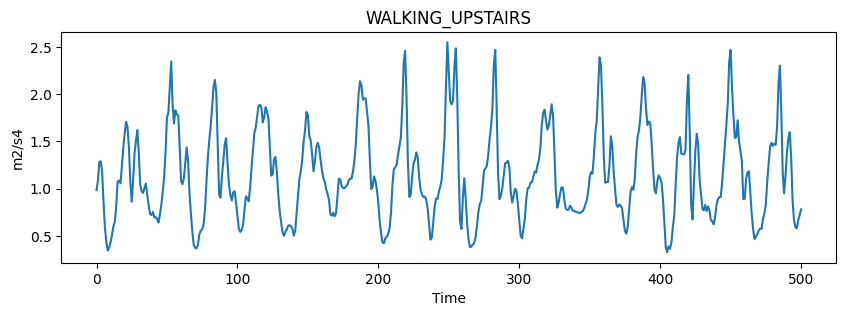

<ipython-input-10-2936006e3fcd>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['a'] = df['accx']**2 + df['accy']**2 + df['accz']**2


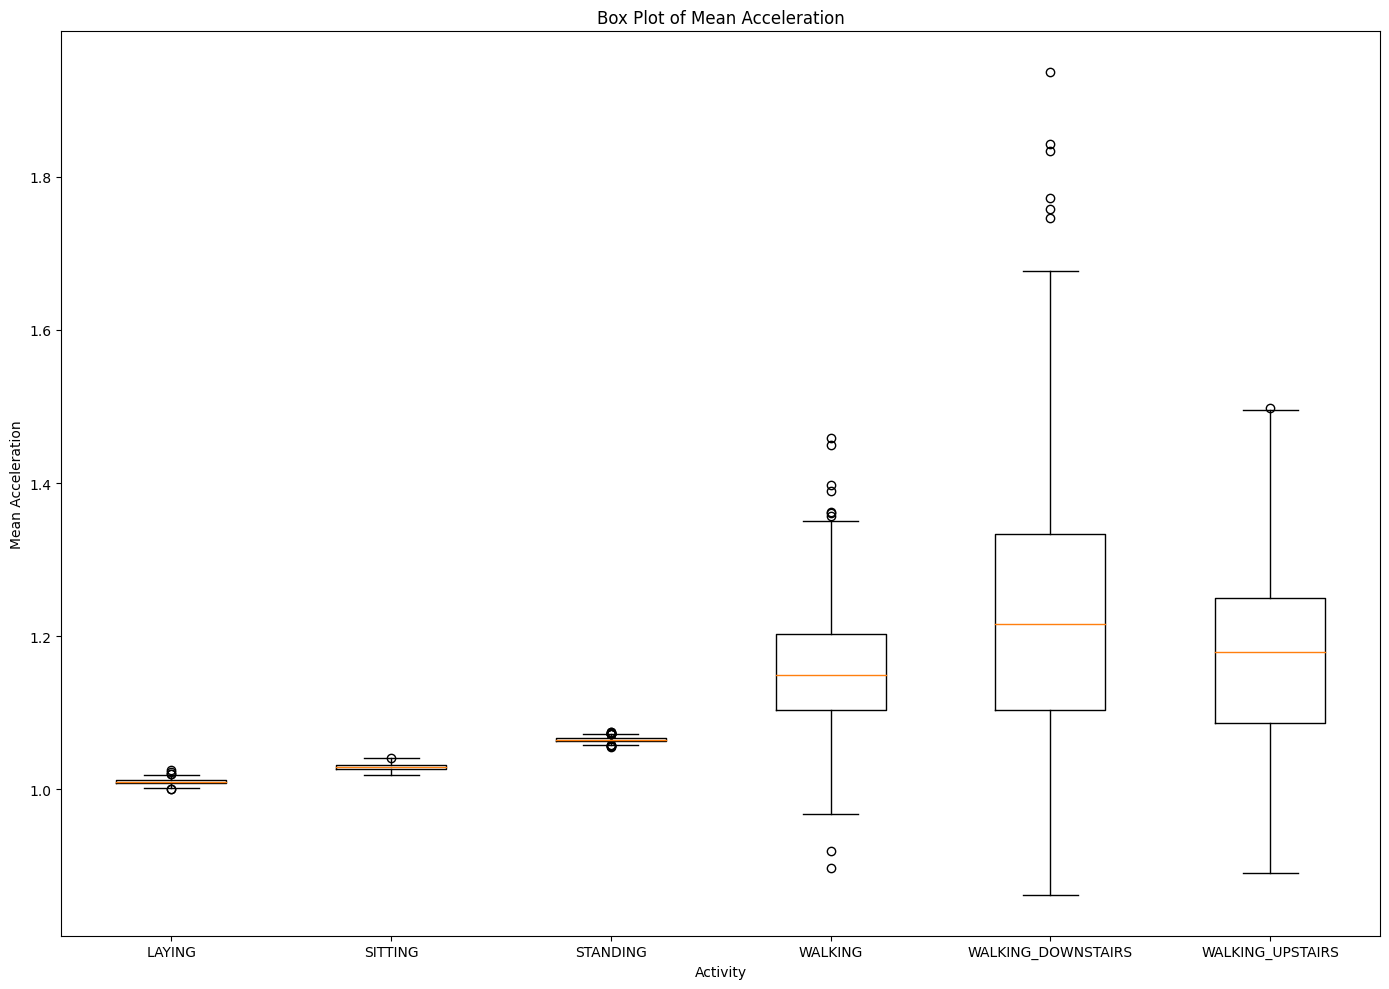

In [ ]:
def liacc(Activity, s):
    Activity["linear_acc"]=Activity['accx']**2 + Activity['accy']**2 + Activity['accz']**2
    plt.figure(figsize=(10,3))
    plt.plot(Activity["linear_acc"].values[:500])
    plt.title(s)
    plt.xlabel("Time")
    plt.ylabel("m2/s4")
    plt.show()


liacc(LAYING, "LAYING")
liacc(SITTING, "SITTING")
liacc(STANDING, "STANDING")
liacc(WALKING, "WALKING")
liacc(WALKING_DOWNSTAIRS, "WALKING_DOWNSTAIRS")
liacc(WALKING_UPSTAIRS, "WALKING_UPSTAIRS")

plt.show()

# Mean PLotting
file_paths = {
    'LAYING': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING",
    'SITTING': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING",
    'STANDING': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING",
    'WALKING': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS"
}

activity_means = []
activity_labels = []

for activity, folder_path in file_paths.items():
    all_data = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)

            if all(col in df.columns for col in ['accx', 'accy', 'accz']):
                df = df.head(500)
                df['a'] = df['accx']**2 + df['accy']**2 + df['accz']**2

                all_data.append(df['a'])

    if all_data:
        combined_data = pd.concat(all_data, axis=1)
        mean_acc = combined_data.mean(axis=1)

        activity_means.extend(mean_acc)
        activity_labels.extend([activity] * len(mean_acc))

plot_data = pd.DataFrame({
    'Activity': activity_labels,
    'Mean': activity_means,
})
fig, axes = plt.subplots(1, 1, figsize=(14, 10), sharex=True)

axes.boxplot([plot_data[plot_data['Activity'] == activity]['Mean'] for activity in file_paths.keys()],
                labels=file_paths.keys())
axes.set_title('Box Plot of Mean Acceleration')
axes.set_ylabel('Mean Acceleration')

plt.xlabel('Activity')
plt.tight_layout()
plt.show()


The plots for static activities like laying, sitting, and standing typically show relatively flat lines with small fluctuations. The variance in these signals is usually low, and there is minimal periodicity.

The plots for dynamic activities like walking, walking downstairs, and walking upstairs will show clear periodic patterns and higher variance. The accelerometer readings will fluctuate significantly due to the repetitive motion of these activities.

while simple techniques might work for differentiating static from dynamic activities, machine learning models become increasingly necessary for distinguishing between different types of dynamic activities due to the complexity and subtlety of the patterns involved.

3.Visualize the data using PCA. [1 marks]
Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

1.Use PCA (Principal Component Analysis) on Total Acceleration
(
a
c
c
x
2
+
a
c
c
y
2
+
a
c
c
z
2
)
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

(126, 501)
(126,)


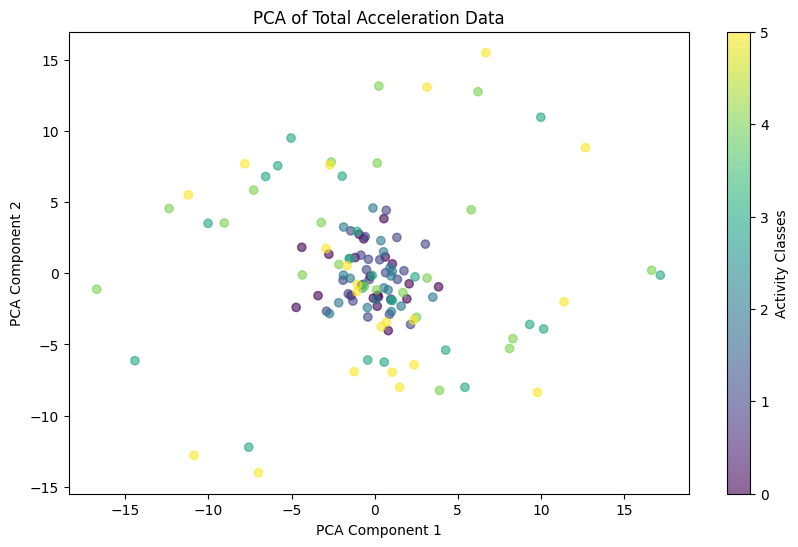

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

activity_dirs = {
    'LAYING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS"
}

samples = []
labels = []

for activity, activity_dir in activity_dirs.items():

    file_names = os.listdir(activity_dir)

    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)

        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]

        total_acceleration = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        total_acceleration=(total_acceleration-total_acceleration.mean())/total_acceleration.std()

        samples.append(total_acceleration)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)
print(samples.shape)
print(labels.shape)

flattened_data = samples.reshape(len(samples), -1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of Total Acceleration Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

2) Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [ ]:
pip install tsfel


*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-49-3d21775f25ef>:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***


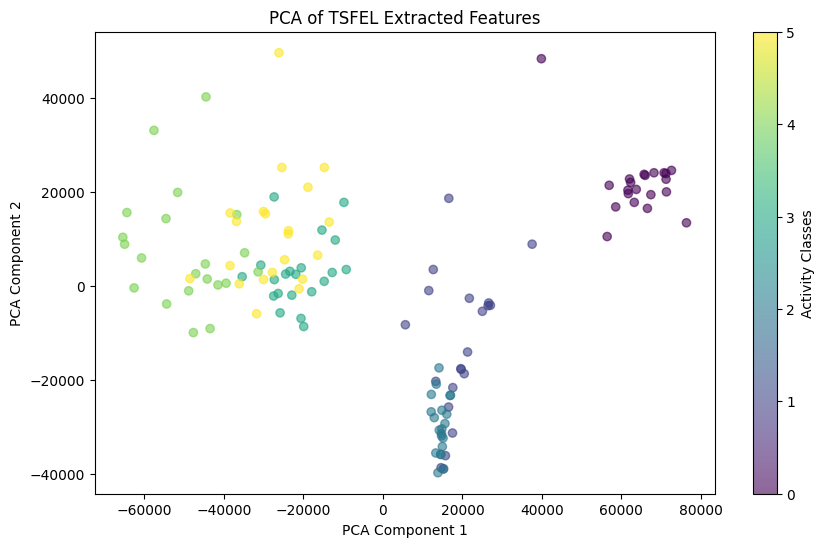

In [ ]:

features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():

    file_names = os.listdir(activity_dir)

    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)

        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        df = pd.DataFrame({
            'acc_x': acc_x,
            'acc_y': acc_y,
            'acc_z': acc_z
        })

        cfg = tsfel.get_features_by_domain()

        features = tsfel.time_series_features_extractor(cfg, df)


        features_list.append(features.values.flatten())
        labels.append(activity)


features_array = np.array(features_list)
labels = np.array(labels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

3) Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

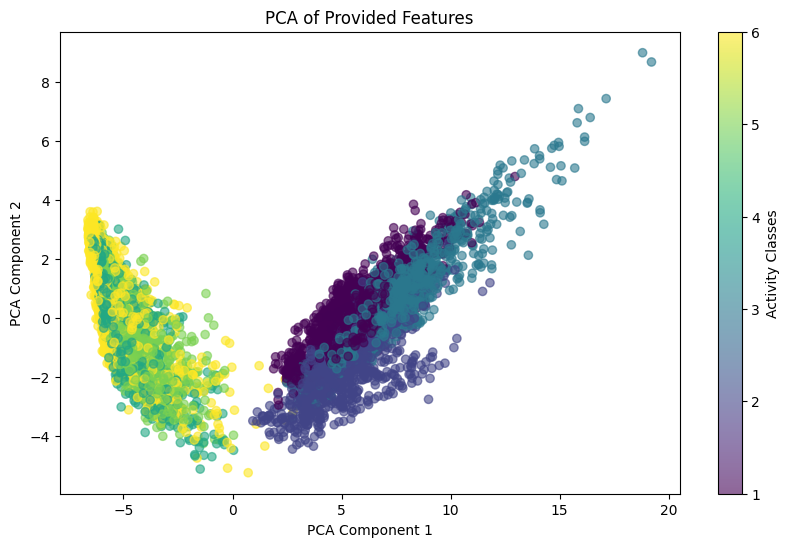

In [ ]:
features_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt"

with open(features_path, 'r') as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]

X_train_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_train_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"

X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train.columns = feature_names

y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train['Activity'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of Provided Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

4) Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

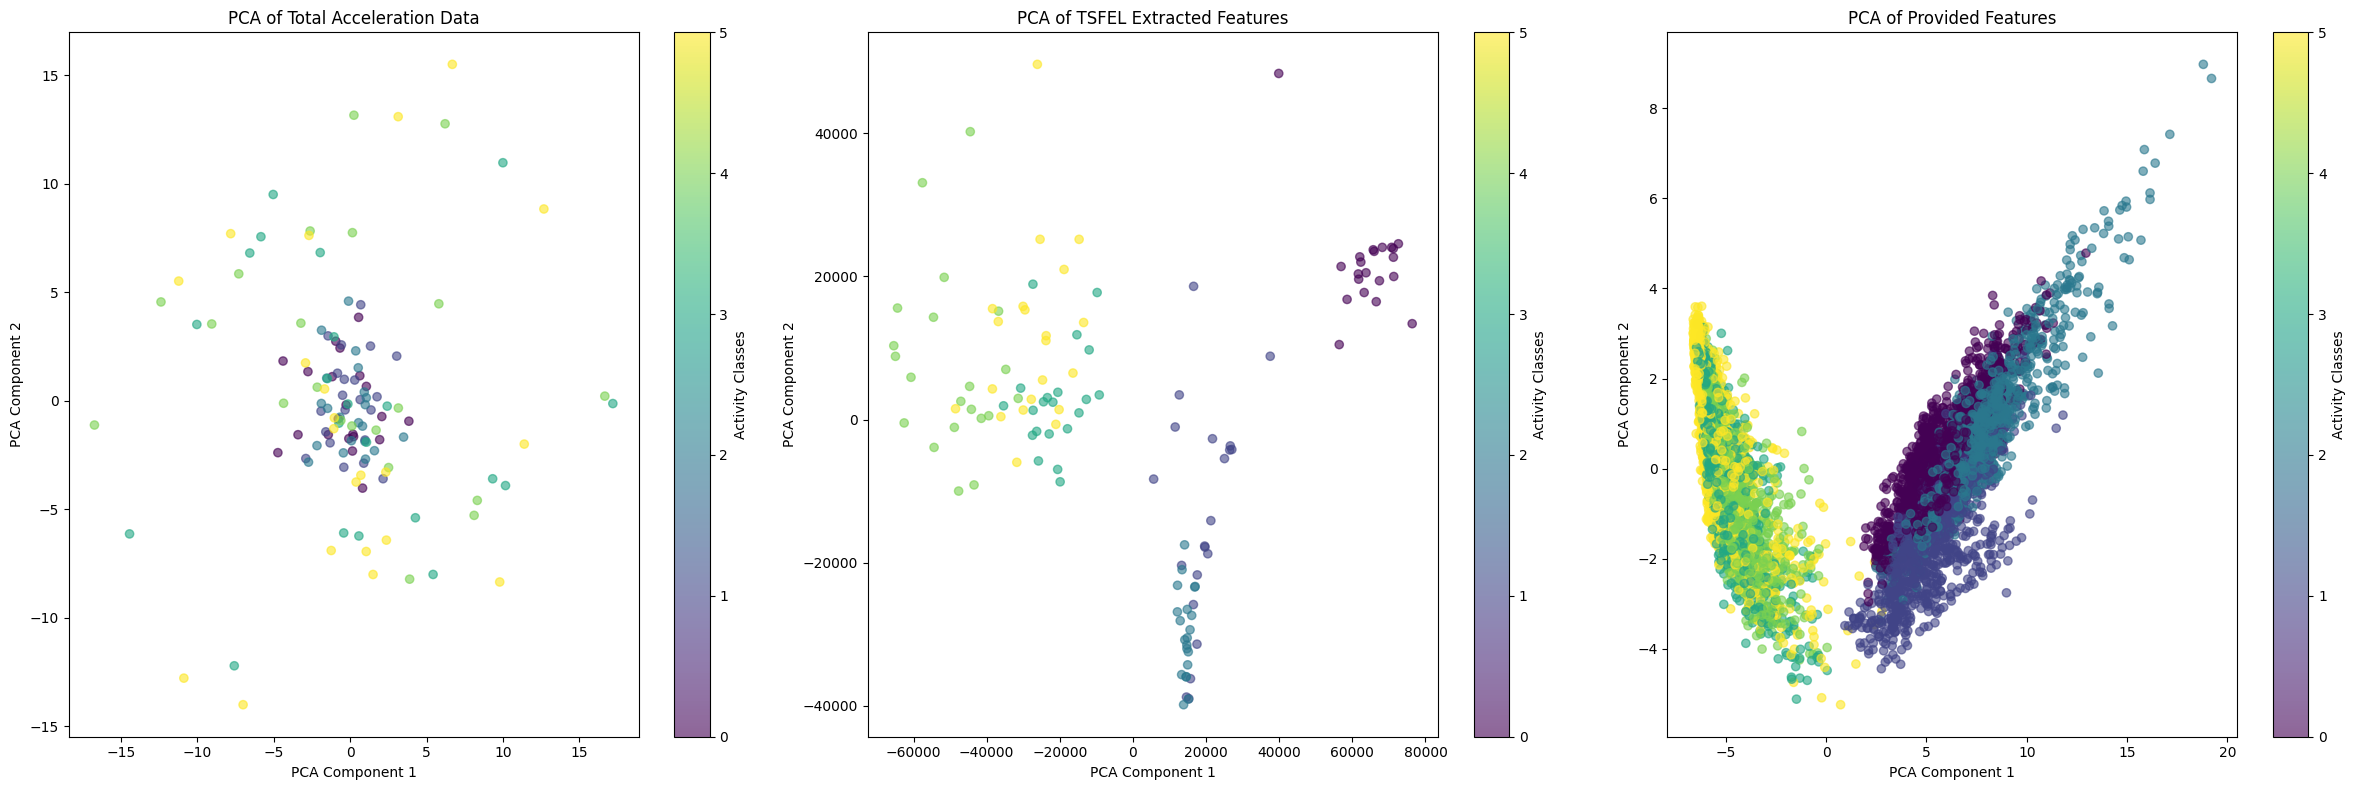

In [ ]:

pca_total_acc = PCA(n_components=2)
pca_result_total_acc = pca_total_acc.fit_transform(flattened_data)


pca_tsfel = PCA(n_components=2)
pca_result_tsfel = pca_tsfel.fit_transform(features_array)

pca_dataset = PCA(n_components=2)
X_pca = pca_dataset.fit_transform(X_train)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# PCA of Total Acceleration Data
scatter_total_acc = axs[0].scatter(pca_result_total_acc[:, 0], pca_result_total_acc[:, 1],
                                   c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels],
                                   cmap='viridis', alpha=0.6)
axs[0].set_title('PCA of Total Acceleration Data')
axs[0].set_xlabel('PCA Component 1')
axs[0].set_ylabel('PCA Component 2')
fig.colorbar(scatter_total_acc, ax=axs[0], label='Activity Classes')

# PCA of TSFEL Extracted Features
scatter_tsfel = axs[1].scatter(pca_result_tsfel[:, 0], pca_result_tsfel[:, 1],
                               c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels],
                               cmap='viridis', alpha=0.6)
axs[1].set_title('PCA of TSFEL Extracted Features')
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')
fig.colorbar(scatter_tsfel, ax=axs[1], label='Activity Classes')

# PCA of Provided Features
scatter_dataset = axs[2].scatter(X_pca[:, 0], X_pca[:, 1],
                                 c=y_train['Activity'] - 1,
                                 cmap='viridis', alpha=0.6)
axs[2].set_title('PCA of Provided Features')
axs[2].set_xlabel('PCA Component 1')
axs[2].set_ylabel('PCA Component 2')
fig.colorbar(scatter_dataset, ax=axs[2], label='Activity Classes')

plt.tight_layout()
plt.show()


Features provided by the dataset are more informative as it shows clearer patterns and clusters. The features provided by the dataset capture specific aspects of the activities being analyzed that is more relevant to distinguishing between different classes of activities.

4.Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [ ]:
with open(features_path, 'r') as f:
    uci_feature_names = [line.strip().split()[1] for line in f.readlines()]

X_train = pd.read_csv(X_train_path, sep='\s+', header=None)
X_train.columns = uci_feature_names
n=len(tsfel_feature_names)

X_train_subset = X_train.iloc[:features_tsfel.shape[0], :]

combined_features = np.hstack((features_tsfel, X_train_subset.values))

combined_feature_names = tsfel_feature_names + [f"UCI_{name}" for name in uci_feature_names[:X_train_subset.shape[1]]]

combined_df = pd.DataFrame(combined_features, columns=combined_feature_names)

def standardize(df):
    return (df - df.mean()) / df.std()

standardized_df = standardize(combined_df)

C = standardized_df.values
cov_matrix = C.T.dot(C) / (C.shape[0] - 1)
cov_matrix_df = pd.DataFrame(cov_matrix, index=combined_feature_names, columns=combined_feature_names)

threshold = 0.88
high_corr_pairs = [(i, j, cov_matrix_df.iat[i, j])
                   for i in range(n)
                   for j in range(n, cov_matrix_df.shape[1])
                   if abs(cov_matrix_df.iat[i, j]) > threshold]

print("Highly correlated pairs of features:")
for pair in high_corr_pairs:
    print(f"Feature {combined_feature_names[pair[0]]} and Feature {combined_feature_names[pair[1]]} with correlation {pair[2]:.2f}")



Highly correlated pairs of features:
Feature TSFEL_acc_x_Wavelet standard deviation_8 and Feature UCI_tBodyAccJerk-entropy()-X with correlation 0.88



Yes there are redundant features for pairs having high coorrelation coeff in either directions as if positive both features give almost same
kind of information while if negative it inverse relation which also can be calculated if one of the feature is given.